# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [1]:
%reload_ext nb_black
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

# 1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important?

c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


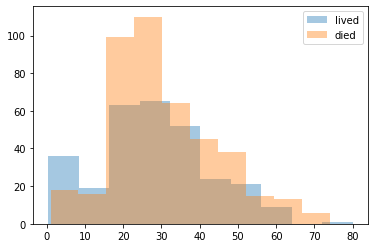

<IPython.core.display.Javascript object>

In [3]:
lived = titanic[titanic["Survived"] == 1]
died = titanic[titanic["Survived"] == 0]

plt.hist(lived["Age"], alpha=0.4, label="lived")
plt.hist(died["Age"], alpha=0.4, label="died")
plt.legend(loc="upper right")
plt.axes()
plt.show()

In [4]:
print(stats.describe(lived["Age"], nan_policy="omit"))
print(stats.describe(died["Age"], nan_policy="omit"))

DescribeResult(nobs=290, minmax=(masked_array(data=0.42,
             mask=False,
       fill_value=1e+20), masked_array(data=80.,
             mask=False,
       fill_value=1e+20)), mean=28.343689655172415, variance=223.5309652320726, skewness=masked_array(data=0.17952299,
             mask=False,
       fill_value=1e+20), kurtosis=-0.07723188107788737)
DescribeResult(nobs=424, minmax=(masked_array(data=1.,
             mask=False,
       fill_value=1e+20), masked_array(data=74.,
             mask=False,
       fill_value=1e+20)), mean=30.62617924528302, variance=200.84869836968642, skewness=masked_array(data=0.5835101,
             mask=False,
       fill_value=1e+20), kurtosis=0.2652058747777075)


<IPython.core.display.Javascript object>

In [5]:
t, p = stats.ttest_ind(lived["Age"], died["Age"], nan_policy="omit")

<IPython.core.display.Javascript object>

In [6]:
t

-2.06668694625381

<IPython.core.display.Javascript object>

In [7]:
p

0.03912465401348333

<IPython.core.display.Javascript object>

In [8]:
signal = lived["Age"].mean() - died["Age"].mean()
noise = np.sqrt(
    lived["Age"].var() / lived["Age"].count() + died["Age"].var() / died["Age"].count()
)

ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise

<IPython.core.display.Javascript object>

In [9]:
(ci_lo, ci_hi)

(-4.469006585637352, -0.09597259458385565)

<IPython.core.display.Javascript object>

# 2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

In [10]:
survived = titanic[titanic["Survived"] == 1]
died = titanic[titanic["Survived"] == 0]

<IPython.core.display.Javascript object>

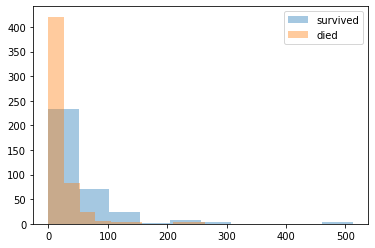

<IPython.core.display.Javascript object>

In [11]:
plt.hist(survived["Fare"], alpha=0.4, label="survived")
plt.hist(died["Fare"], alpha=0.4, label="died")
plt.legend(loc="upper right")
plt.show()

# Not good for t test, these variables are not normally distributed

In [12]:
print(stats.describe(survived["Fare"]))
print(stats.describe(died["Fare"]))

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)
DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)


<IPython.core.display.Javascript object>

In [13]:
t, p = stats.ttest_ind(survived["Fare"], died["Fare"])

<IPython.core.display.Javascript object>

In [14]:
t

7.939191660871055

<IPython.core.display.Javascript object>

In [15]:
p

6.120189341924198e-15

<IPython.core.display.Javascript object>

In [16]:
signal = survived["Fare"].mean() - died["Fare"].mean()
noise = np.sqrt(
    survived["Fare"].var() / survived["Fare"].count()
    + died["Fare"].var() / died["Fare"].count()
)

ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise

<IPython.core.display.Javascript object>

In [17]:
(ci_lo, ci_hi)

(18.746713127616708, 33.808328306569855)

<IPython.core.display.Javascript object>